In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load Data

In [ ]:
df = pd.read_csv(r'C:\Users\Germán\Github\ProyectoFinal\data\vehiculos-de-segunda-mano-sample.csv')

## Duplicados

In [5]:
#ver cantidad de duplicados 
df.duplicated().sum()


np.int64(0)

In [6]:
# Eliminamos duplicados 
df = df.drop_duplicates()

In [7]:
print(df.shape)

(42355, 18)


In [8]:
#Mostrar nombres de cada columna en una lista
print(df.columns)


Index(['make', 'model', 'version', 'fuel', 'year', 'kms', 'power', 'shift',
       'price', 'location', 'publish_date', 'dealer_address',
       'dealer_zip_code', 'dealer_city', 'dealer_country_code', 'lat', 'long',
       'state'],
      dtype='object')


Drop columns

In [48]:
# 'dealer_city', 'dealer_country_code'

In [49]:
#Drop 'vehicle_type','doors','color','photos', 'description','currency','update_date','dealer_description','dealer_address', 'dealer_zip_code','dealer_is_professional','dealer_city', 'dealer_country_code','dealer_website','dealer_registered_at', 'date'
df = df.drop(['dealer_name','vehicle_type','doors','color','photos', 'description','currency','update_date','dealer_description','dealer_is_professional','dealer_website','dealer_registered_at',"date"], axis=1)

In [50]:
df.duplicated().sum()


np.int64(57058)

In [51]:
df.drop_duplicates(inplace=True)

In [52]:
df.shape

(42705, 15)

## Nulls

In [63]:
#Mostramos los nulos en porcetaje con relacion al total por cada fila 
df.isnull().sum()/df.shape[0]*100

make                   0.0
model                  0.0
version                0.0
fuel                   0.0
year                   0.0
kms                    0.0
power                  0.0
shift                  0.0
price                  0.0
location               0.0
publish_date           0.0
dealer_address         0.0
dealer_zip_code        0.0
dealer_city            0.0
dealer_country_code    0.0
dtype: float64

### Drop nulls from version and kms

In [55]:
#Drop nuls de "verion", kms, power,dealer_name
df = df.dropna(subset=['version', 'kms',"dealer_address"])

### Fixing Fuel, Power and Shift nulls

In [57]:
#Lista de variables a rellenar
variables = ['fuel', 'power', 'shift']
 
# Función para calcular la moda o mediana por modelo
def calculate_stat_by_model(df, var):
    if var == 'power':
        return df.groupby('model')[var].transform(lambda x: x.median() if not pd.isna(x.median()) else None)
    else:
        return df.groupby('model')[var].transform(lambda x: x.mode()[0] if not x.mode().empty else None)
 
# Función para rellenar los valores nulos
def fill_missing_values(df, var):
    stat_by_model = calculate_stat_by_model(df, var)
    df[var] = df[var].fillna(stat_by_model)
    return df
 
# Aplicar la función para cada variable
for var in variables:
    df = fill_missing_values(df, var)

c:\Users\Germán\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1231: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [58]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)
 
# Mostrar el resultado completo para 'shift'
shift_nulls = df[df['shift'].isnull()][['make', 'model']].value_counts()
print("Shift Nulls:")
print(shift_nulls)

# Mostrar el resultado completo para 'power'
power_nulls = df[df['power'].isnull()][['make', 'model']].value_counts()
print("\nPower Nulls:")
print(power_nulls)

# Mostrar el resultado completo para 'fuel'
fuel_nulls = df[df['fuel'].isnull()][['make', 'model']].value_counts()
print("\nFuel Nulls:")
print(fuel_nulls)

Shift Nulls:
make   model 
Lotus  Esprit    1
Name: count, dtype: int64

Power Nulls:
make     model  
Citroen  ë-Jumpy    1
Name: count, dtype: int64

Fuel Nulls:
make     model    
Ferrari  LaFerrari    1
Lotus    Esprit       1
Tata     Indigo       1
Name: count, dtype: int64


In [59]:
#Rellenamos citroen e-jumpy con 100
df.loc[(df['make'] == 'Citroen') & (df['model'] == 'ë-Jumpy'), 'power'] = 100

In [60]:
#Rellenamos Lotus Esprit con manual
df.loc[(df['make'] == 'Lotus') & (df['model'] == 'Esprit'), 'shift'] = "manual"

In [61]:
modelos = "LaFerrari","Indigo","Esprit"
df.loc[df['model'].isin(modelos), 'fuel'] = 'Gasolina'

# Columna nueva Provincias

In [469]:
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut

In [470]:
# Crear el geocodificador
geolocator = Nominatim(user_agent="my_app")
 
# Función para obtener la provincia a partir de una localización
def get_province(dealer_address):
    try:
        loc = geolocator.geocode(dealer_address, timeout=10)
        if loc:
            address = geolocator.reverse((loc.latitude, loc.longitude), timeout=10).raw['address']
            return address.get('state', 'Unknown')  # 'state' puede variar dependiendo del país
        else:
            return 'Unknown'
    except GeocoderTimedOut:
        return 'Unknown'
 
# Aplicar la función a la columna 'location' y crear una nueva columna 'province'
df['province'] = df['dealer_address'].apply(get_province)
 
# Mostrar el DataFrame resultante
print(df)

KeyboardInterrupt: 

# Dtypes

In [64]:
df.dtypes

make                    object
model                   object
version                 object
fuel                    object
year                     int64
kms                    float64
power                  float64
shift                   object
price                    int64
location                object
publish_date            object
dealer_address          object
dealer_zip_code        float64
dealer_city             object
dealer_country_code     object
dtype: object

In [65]:
#Publish date to datetime
df['publish_date'] = pd.to_datetime(df['publish_date'])

In [68]:
df.shape

(42355, 15)

# location latitud and longitude

### Reading latitud and longitude excel

In [496]:
# pip install pandas openpyxl

Note: you may need to restart the kernel to use updated packages.


In [497]:
# Ruta del archivo Excel
ruta_excel = r"C:\Users\Germán\Github\Proyecto2\data\listado-longitud-latitud-municipios-espana.xls"  
ruta_csv = r"C:\Users\Germán\Github\ProyectoFinal\data\dffinal.csv"    

# Leer el archivo Excel
datos_excel = pd.read_excel(ruta_excel)

# Guardar como CSV
datos_excel.to_csv(ruta_csv, index=False)

print(f"Archivo convertido y guardado como {ruta_csv}")


Archivo convertido y guardado como C:\Users\Germán\Github\Proyecto2\data\municipios.csv


In [498]:
#Eliminar la primera filas
datos = datos.drop(0)

In [499]:
#Hacemos que la primera fila sea el header
datos.columns = datos.iloc[0]

#Eliminamos la primera fila
datos = datos.drop(1)

In [500]:
#Quitamos acentos en el header
datos.columns = datos.columns.str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')

#Quitamo mayusculas en el header
datos.columns = datos.columns.str.lower()

In [501]:
datos.head(1)

1,comunidad,provincia,poblacion,latitud,longitud,altitud,habitantes,hombres,mujeres
2,Andalucía,Almería,Abla,37.14114,-2.780104,871.1684,1504,783,721


### Merge both csv

In [502]:
# Asegúrate de que las columnas tengan el mismo nombre para el merge
datos.rename(columns={'poblacion': 'location'}, inplace=True)

# Realizar el merge
df_final = pd.merge(df, datos[['location', 'latitud', 'longitud']], on='location', how='left')


In [503]:
df_final.head(1)

,make,model,version,fuel,year,kms,power,shift,price,location,publish_date,dealer_address,dealer_zip_code,latitud,longitud
0,Opel,Crossland,1.2 GAS 110 GS Line 5p S/S,Gasolina,2022,5.0,110.0,manual,22900,Pineda de Mar,2023-02-04,"2, Carrer de Jacint Benavente, Poblenou, Pineda de Mar, Maresme, Barcelona, Catalunya, 08397, España",8397.0,41.62751,2.689454


In [507]:
df_final.shape

(42404, 15)

In [508]:
df.shape

(42355, 13)

In [506]:
df_final.isnull().sum()/df.shape[0]*100

make                0.000000
model               0.000000
version             0.000000
fuel                0.000000
year                0.000000
kms                 0.000000
power               0.000000
shift               0.000000
price               0.000000
location            0.000000
publish_date        0.000000
dealer_address      0.000000
dealer_zip_code     0.000000
latitud            20.963287
longitud           20.963287
dtype: float64

# Getting coordinates

In [70]:
df_coordenadas = df[['dealer_address', 'dealer_city', 'dealer_country_code']]

In [ ]:
import pandas as pd
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut, GeocoderServiceError
import time

def clean_address(address):
    """
    Limpia y formatea la dirección
    """
    if pd.isna(address):
        return ""
    # Convertir a string si no lo es
    address = str(address)
    # Eliminar caracteres especiales y espacios extras
    address = address.replace("NaN", "").strip()
    return address

def get_coordinates(address, city, country_code):
    """
    Get latitude and longitude from address using Nominatim geocoder
    """
    # Limpiar los componentes de la dirección
    address = clean_address(address)
    city = clean_address(city)
    country_code = clean_address(country_code)
    
    # Si no hay suficiente información, retornar None
    if not (address and city and country_code):
        print(f"Información incompleta: {address}, {city}, {country_code}")
        return None, None
    
    # Crear la dirección completa
    full_address = f"{address}, {city}, {country_code}"
    print(f"Buscando dirección: {full_address}")  # Para depuración
    
    # Initialize the geocoder
    geolocator = Nominatim(user_agent="my_vehicles_app")
    
    try:
        time.sleep(1)  # Respetar límites de la API
        
        # Intentar primero con la dirección completa
        location = geolocator.geocode(full_address)
        
        # Si falla, intentar solo con ciudad y país
        if not location:
            print("Intentando con ciudad y país...")
            location = geolocator.geocode(f"{city}, {country_code}")
        
        if location:
            print(f"Encontrado: {location.latitude}, {location.longitude}")
            return location.latitude, location.longitude
        else:
            print("No se encontró la ubicación")
            return None, None
            
    except (GeocoderTimedOut, GeocoderServiceError) as e:
        print(f"Error de geocodificación: {str(e)}")
        return None, None

def get_province_from_coordinates(lat, long):
    """
    Obtiene la provincia utilizando las coordenadas de latitud y longitud
    """
    if lat is None or long is None:
        return 'Unknown'
    
    geolocator = Nominatim(user_agent="my_vehicles_app")
    try:
        time.sleep(1)  # Respetar límites de la API
        location = geolocator.reverse((lat, long), timeout=10).raw['address']
        print(f"Provincia encontrada: {location.get('state', 'Unknown')}")  # 'state' puede variar dependiendo del país
        return location.get('state', 'Unknown')  # 'state' puede variar dependiendo del país
    except (GeocoderTimedOut, GeocoderServiceError, KeyError) as e:
        print(f"Error al obtener la provincia: {str(e)}")
        return 'Unknown'

def add_coordinates_and_state_to_df(df):
    """
    Add latitude, longitude, and state columns to the DataFrame
    """
    # Initialize new columns
    df['lat'] = None
    df['long'] = None
    df['state'] = None
    
    # Iterate through rows
    for idx, row in df.iterrows():
        print(f"\nProcesando fila {idx + 1}/{len(df)}")
        
        # Imprimir los valores para depuración
        print(f"Dirección: {row.get('dealer_address', 'No disponible')}")
        print(f"Ciudad: {row.get('dealer_city', 'No disponible')}")
        print(f"País: {row.get('dealer_country_code', 'No disponible')}")
        
        # Obtener latitud y longitud
        lat, long = get_coordinates(
            row.get('dealer_address', ''),
            row.get('dealer_city', ''),
            row.get('dealer_country_code', '')
        )
        
        # Obtener la provincia si se encontraron coordenadas
        state = get_province_from_coordinates(lat, long)
        
        # Actualizar el DataFrame
        df.at[idx, 'lat'] = lat
        df.at[idx, 'long'] = long
        df.at[idx, 'state'] = state
    
    return df


In [ ]:
# df_final = add_coordinates_and_state_to_df(df2)

Exportamos asi no tenemos que correr el codigo de arriba ya que tardo más de 15 horas en calcular las coordenadas


In [ ]:
# df_final.to_csv(r'C:\Users\Germán\Github\ProyectoFinal\data\dffinal', index=False)

In [11]:
df_final = pd.read_csv(r'C:\Users\Germán\Github\ProyectoFinal\data\dffinal.csv')

In [17]:
df_final.columns

Index(['make', 'model', 'version', 'fuel', 'year', 'kms', 'power', 'shift',
       'price', 'location', 'publish_date', 'dealer_address',
       'dealer_zip_code', 'dealer_city', 'dealer_country_code', 'lat', 'long',
       'state', 'kms_category'],
      dtype='object')

# EDA

### Kms

In [12]:
#Generar una columna nueva diviendo los datos segun la cantidad de kms en 3 categorias
df_final['kms_category'] = pd.cut(df['kms'], bins=[0, 50000, 100000, 150000, float("inf")], labels=['Bajo', 'Medio', 'Alto', 'Muy Alto'])

#Mostrar la cantidad de autos por cada categoria
print(df_final['kms_category'].value_counts())

kms_category
Medio       15327
Bajo        12272
Alto        10066
Muy Alto     4650
Name: count, dtype: int64


C:\Users\Germán\AppData\Local\Temp\ipykernel_33720\599740204.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_final, x='kms_category', palette='viridis')


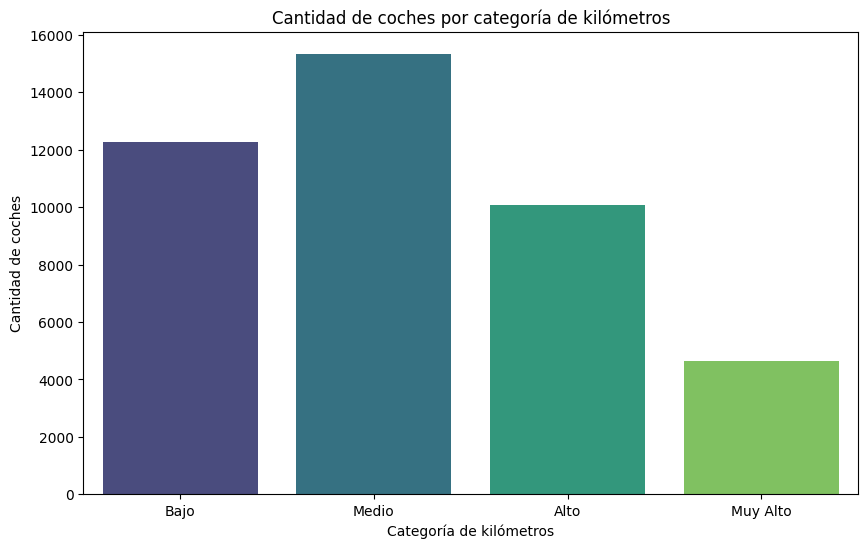

In [13]:
#Gráfico de barras de la cantidad de coches por cada categoria
plt.figure(figsize=(10, 6))
sns.countplot(data=df_final, x='kms_category', palette='viridis')
plt.title('Cantidad de coches por categoría de kilómetros')
plt.xlabel('Categoría de kilómetros')
plt.ylabel('Cantidad de coches')
plt.show()

C:\Users\Germán\AppData\Local\Temp\ipykernel_33720\1674697458.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_final, x='kms_category', y='price',palette='viridis')


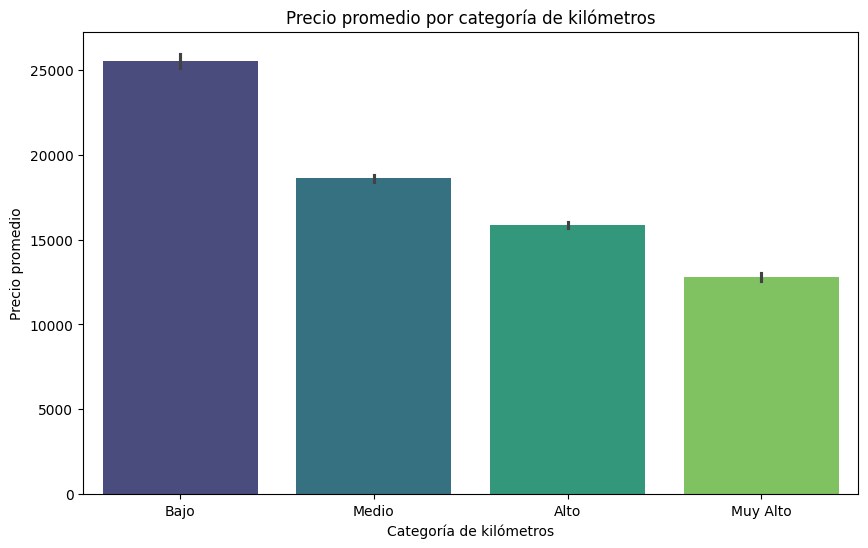

In [14]:
#Precio promedio segun categoria de kms.
plt.figure(figsize=(10, 6))
sns.barplot(data=df_final, x='kms_category', y='price',palette='viridis')
plt.title('Precio promedio por categoría de kilómetros')
plt.xlabel('Categoría de kilómetros')
plt.ylabel('Precio promedio')
plt.show()

### Fuel Type

C:\Users\Germán\AppData\Local\Temp\ipykernel_33720\732314301.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_final, x='fuel', y='price',palette='viridis')


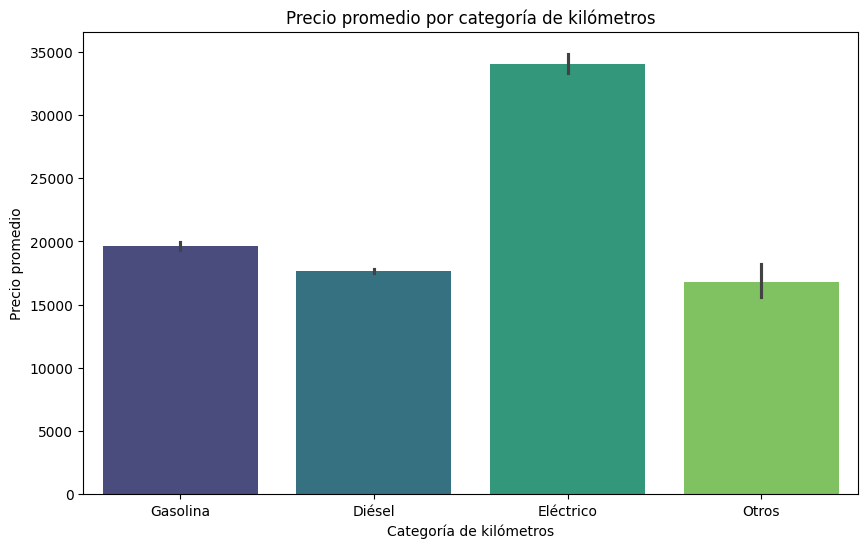

In [15]:
#Precio promedio segun categoria de kms.
plt.figure(figsize=(10, 6))
sns.barplot(data=df_final, x='fuel', y='price',palette='viridis')
plt.title('Precio promedio por categoría de kilómetros')
plt.xlabel('Categoría de kilómetros')
plt.ylabel('Precio promedio')
plt.show()

### Shift Type

C:\Users\Germán\AppData\Local\Temp\ipykernel_33720\3454441385.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_final, x='shift', y='price',palette='viridis')


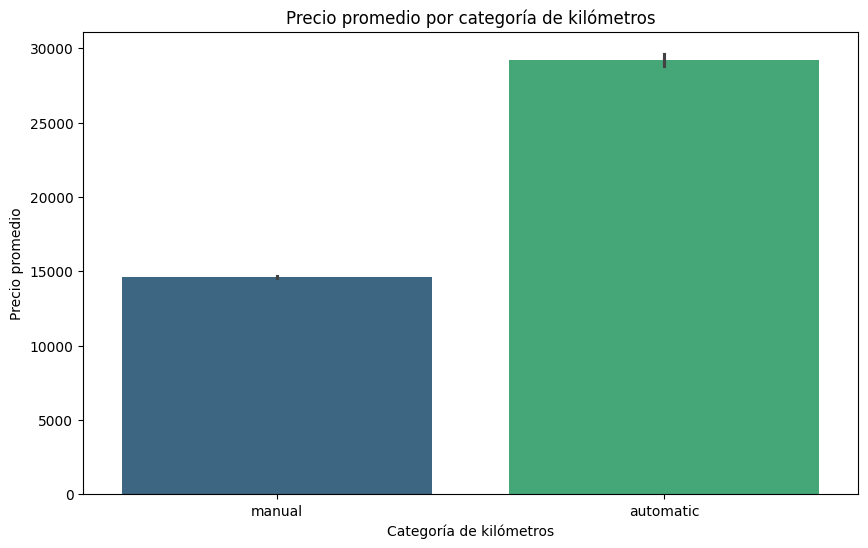

In [18]:
#Precio promedio segun categoria de kms. grafica
plt.figure(figsize=(10, 6))
sns.barplot(data=df_final, x='shift', y='price',palette='viridis')
plt.title('Precio promedio por categoría de kilómetros')
plt.xlabel('Categoría de kilómetros')
plt.ylabel('Precio promedio')
plt.show()

### Year

C:\Users\Germán\AppData\Local\Temp\ipykernel_33720\3217641251.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=df_final, x='year', y='price', palette='viridis')


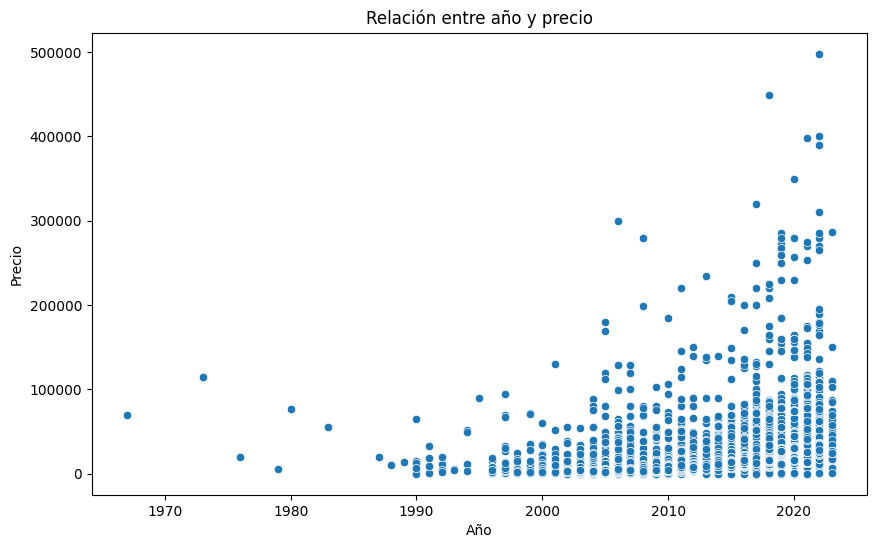

In [19]:
#Relacion entre year y precio 
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_final, x='year', y='price', palette='viridis')
plt.title('Relación entre año y precio')
plt.xlabel('Año')
plt.ylabel('Precio')
plt.show()

C:\Users\Germán\AppData\Local\Temp\ipykernel_33720\2605619257.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_final, x='state', y='price',palette='viridis')


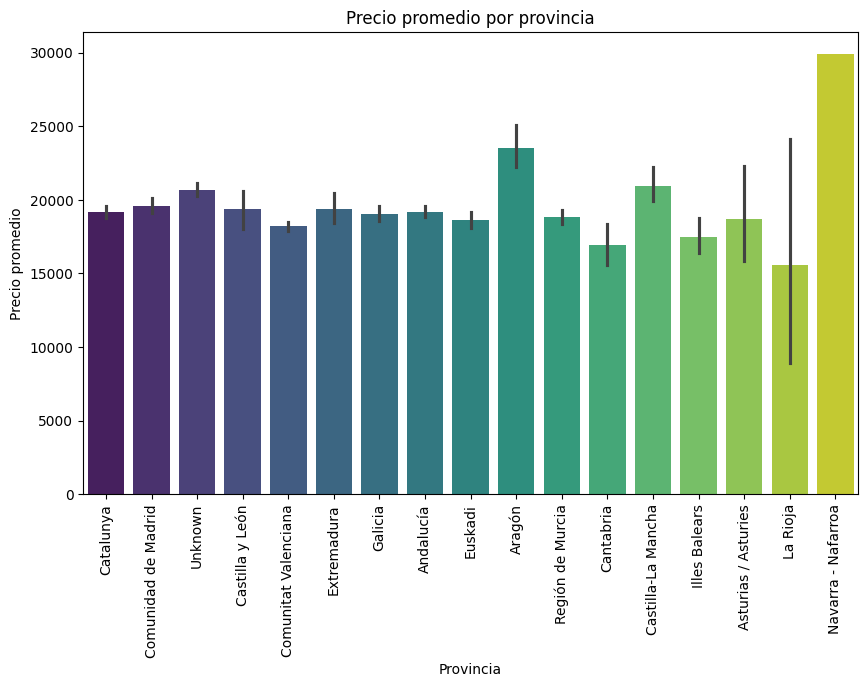

In [20]:
#Precio promedio segun provincia
plt.figure(figsize=(10, 6))
sns.barplot(data=df_final, x='state', y='price',palette='viridis')
plt.title('Precio promedio por provincia')
plt.xlabel('Provincia')
plt.ylabel('Precio promedio')
plt.xticks(rotation=90)
plt.show()

In [ ]:
binnedprices = pd.cut(df['price'], 10000)
binedcounts = binnedprices.value_counts()

grouped_makes = df.groupby(binnedprices)['make'].apply(list).reset_index()
grouped_makes.columns  = ['price_range', 'make']
